# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [80]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
df = pd.read_csv("soil_measures.csv")

# Write your code here

## Define Global Variables

In [81]:
# Define the target variable in the df
target = 'crop'

# EDA

## Explore DataFrame

In [82]:
# Show the fields and data types of the data frame
print(df.info())

# Show statisitcs for the df
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


## Explore Target Variable

Frequency of the target
The target variable contains 22 unique values
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64


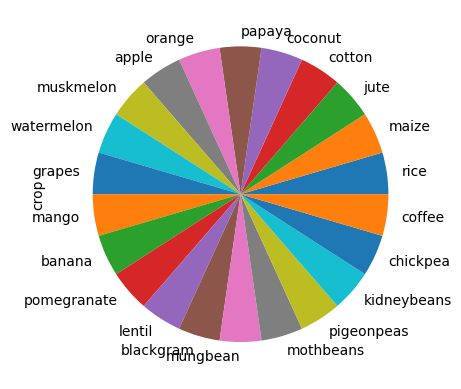

In [83]:
# Show the frequency of the target variable
df[target].value_counts(normalize=True).plot.pie()

# Print Frequency
print('Frequency of the target')
print('The target variable contains {} unique values'.format(len(df[target].unique())))
print(df[target].value_counts())




## Check for Missing Values

In [84]:
print('Missing Values Check')
print(df.isna().sum())

Missing Values Check
N       0
P       0
K       0
ph      0
crop    0
dtype: int64


## Check statistics by target variable

In [85]:
df.groupby(target).mean().reset_index()

,crop,N,P,K,ph
0,apple,20.80,134.22,199.89,5.929663
1,banana,100.23,82.01,50.05,5.983893
2,blackgram,40.02,67.47,19.24,7.133952
3,chickpea,40.09,67.79,79.92,7.336957
4,coconut,21.98,16.93,30.59,5.976562
5,coffee,101.20,28.74,29.94,6.790308
6,cotton,117.77,46.24,19.56,6.912675
7,grapes,23.18,132.53,200.11,6.025937
8,jute,78.40,46.86,39.99,6.732778
9,kidneybeans,20.75,67.54,20.05,5.749411


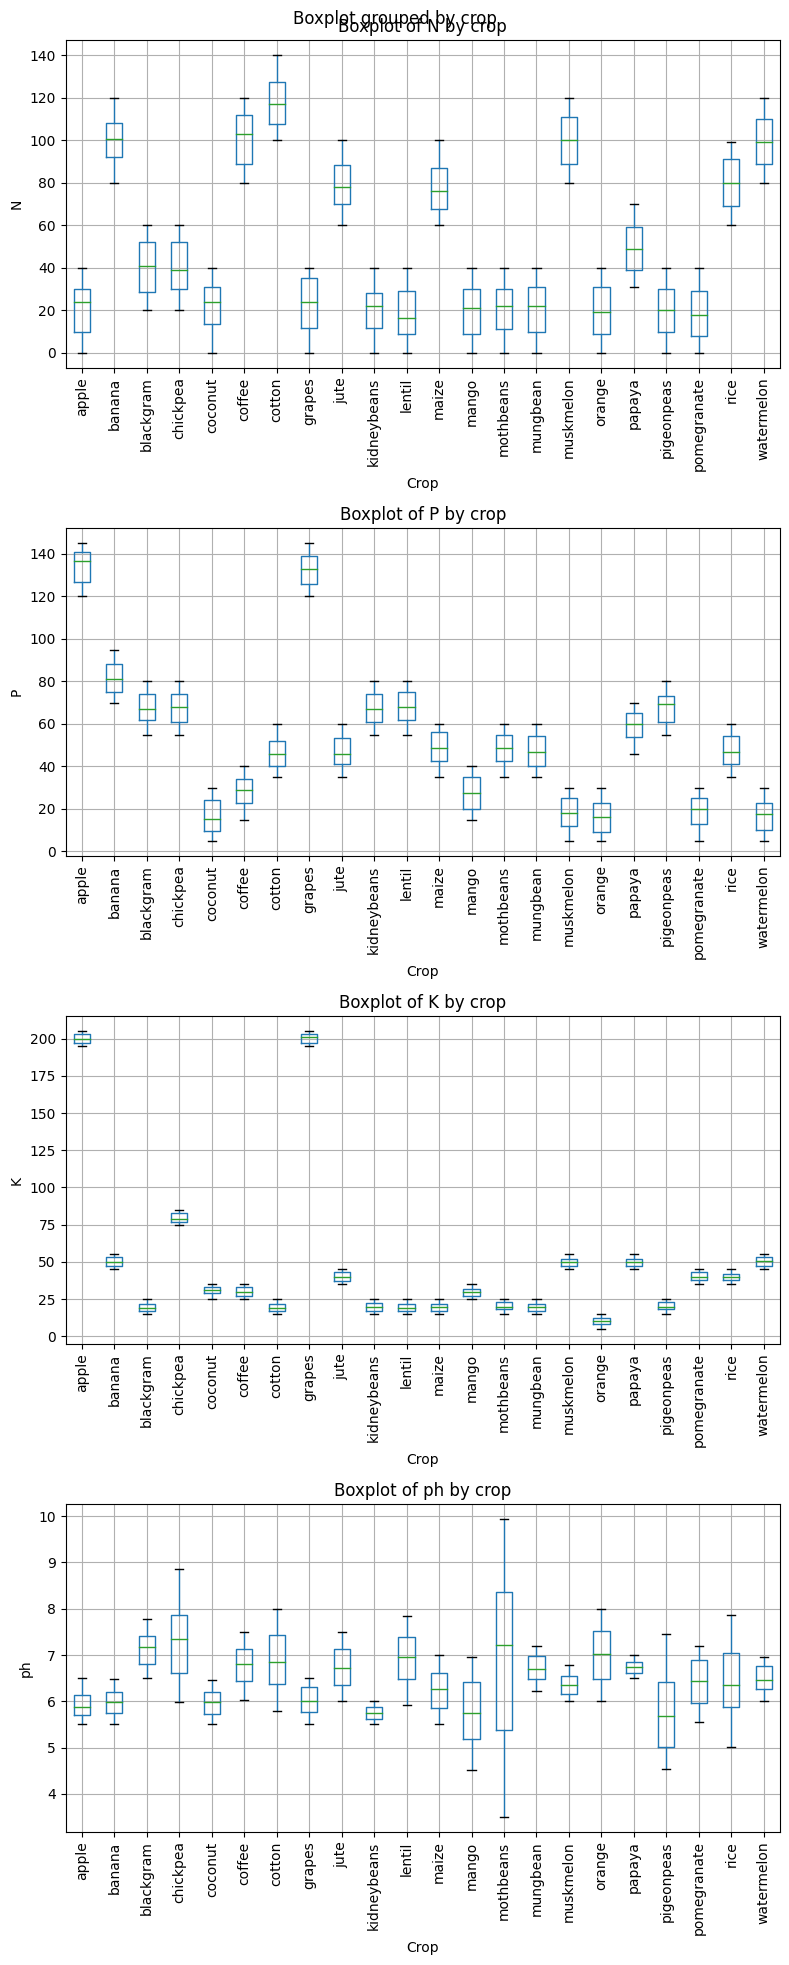

In [86]:

# Create a boxplot for each column by the crop variable
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))

columns = ['N', 'P', 'K', 'ph']

for i, column in enumerate(columns):
    df.boxplot(column=column, by='crop', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by crop')
    axes[i].set_xlabel('Crop')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

<Figure size 2400x600 with 0 Axes>

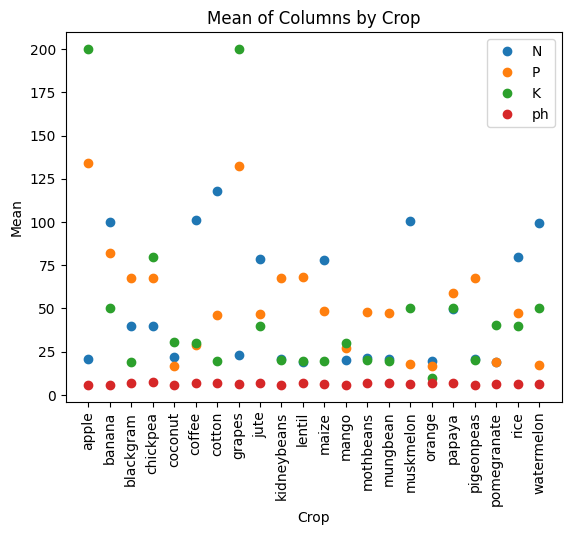

In [87]:
# Calculate the mean of all columns by crop
mean_values = df.groupby('crop').mean()

# Set the figure size
plt.figure(figsize=(24, 6))

# Plot the mean values using markers
mean_values.plot(marker='o', linestyle='')

# Set the x-axis label
plt.xlabel('Crop')

# Set the y-axis label
plt.ylabel('Mean')

# Set the title of the plot
plt.title('Mean of Columns by Crop')

# Show all values on the x-axis
plt.xticks(range(len(mean_values.index)), mean_values.index, rotation=90)

# Show the plot
plt.show()

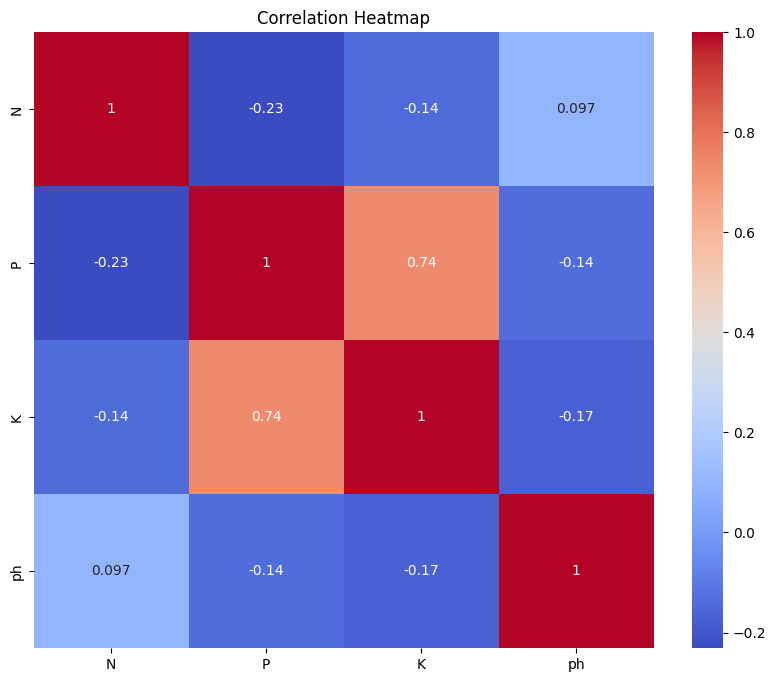

In [88]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

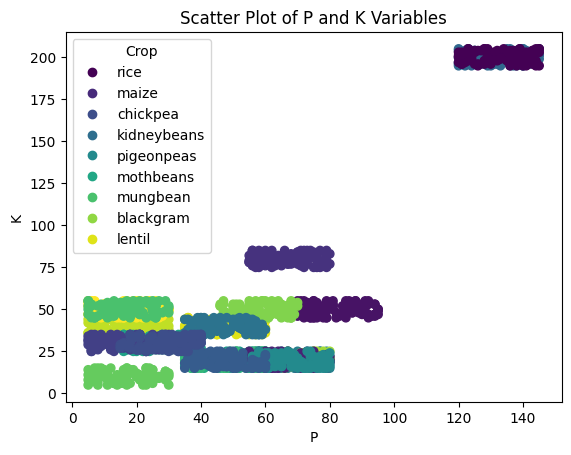

In [89]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a scatter plot of P and K variables with color based on crop
scatter = plt.scatter(df['P'], df['K'], c=df['crop'].astype('category').cat.codes)

# Set the x-axis label
plt.xlabel('P')

# Set the y-axis label
plt.ylabel('K')

# Set the title of the plot
plt.title('Scatter Plot of P and K Variables')

# Create a legend for the colors
legend_elements = scatter.legend_elements()[0]
plt.legend(legend_elements, df['crop'].unique(), title='Crop')

# Show the plot
plt.show()

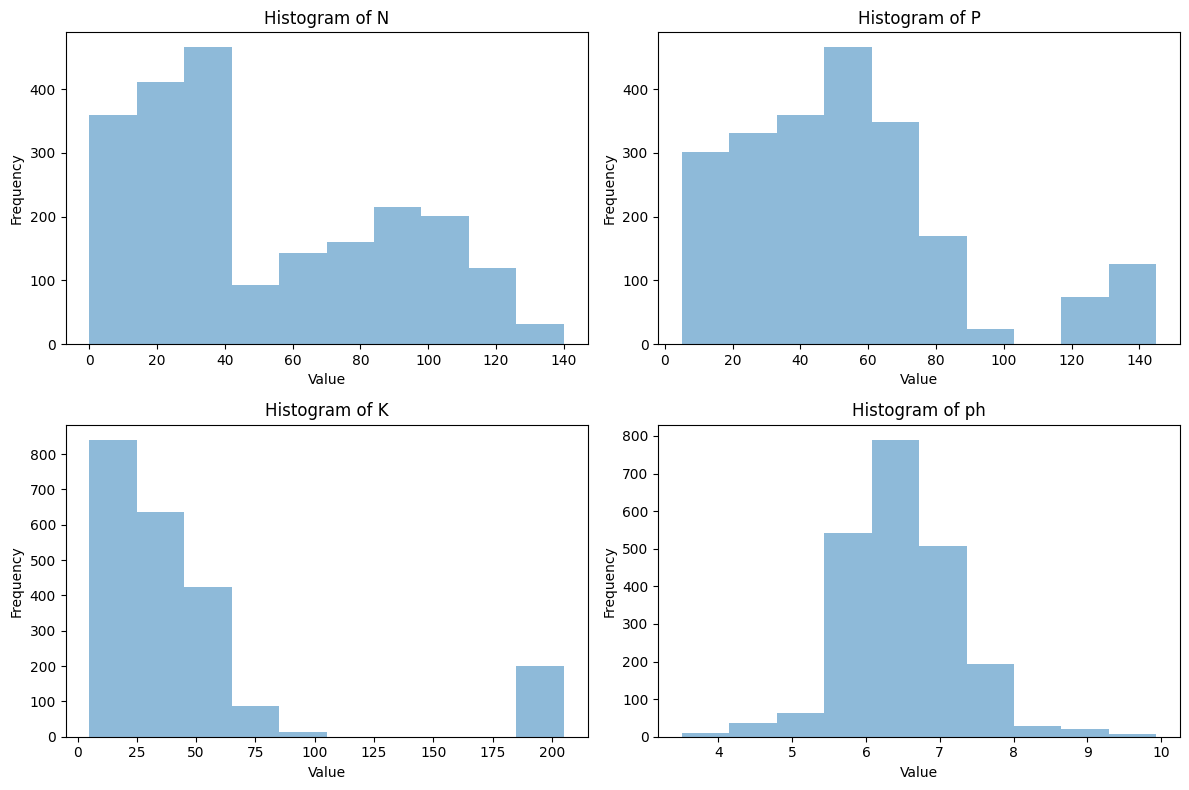

In [90]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a histogram for each column in df excluding the 'crop' column
for i, column in enumerate(df.columns):
    if column != 'crop':
        plt.subplot(2, 2, i%4+1)  # Fix the error by using modulo operator
        plt.hist(df[column], bins=10, alpha=0.5)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Split the Data to Train and Test

In [91]:
# Breakout the target (y) and features (X)
X = df.drop(target, axis=1).values
y = df[target].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Predict the crop using each feature

In [92]:
# Create a list of features
X_features = list(df.drop(target, axis=1).columns)

# Instantiate the model with max_iter set to 2000 and multi_class set to 'auto'
logreg = LogisticRegression(max_iter=2000, multi_class="multinomial")

# Create an empty list to store the F1 scores
f1_scores = []

# Loop through each feature using enumerate
for i, feature in enumerate(X_features):
    # Fit the model using the current feature
    logreg.fit(X_train[:, i].reshape(-1, 1), y_train)
    
    # Predict the target variable for the test set
    y_pred = logreg.predict(X_test[:, i].reshape(-1, 1))
    
    # Calculate the F1 score and append it to the list
    f1_scores.append((feature,f1_score(y_test, y_pred, average='weighted')))
    
# Print the F1 scores for each feature
print(f1_scores)

[('N', 0.12221912814270404), ('P', 0.1681796557631306), ('K', 0.2691443992676175), ('ph', 0.07481616268017899)]


## Produce the Final Model

In [93]:
# List the final features of N and K
# Breakout the target (y) and features (X)
final_features = ['N', 'K', 'ph']

X = df[final_features]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the model
log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")

# Fit the model
log_reg.fit(X_train, y_train)

# Predict 
y_pred = log_reg.predict(X_test)

# Capture the F1 Score
model_performance = f1_score(y_test, y_pred, average='weighted')  # Add 'average' parameter

# Print Final Features and F1 Score
print(f"The final features, {final_features}, and F1 Score {model_performance}")

The final features, ['N', 'K', 'ph'], and F1 Score 0.5538764312749472
